In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("titanic_train.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
import numpy as np
df["cabin_null"]= np.where(df["Cabin"].isnull(),1,0)

In [14]:
df["cabin_null"].mean()

0.7710437710437711

In [18]:
df.groupby(["Survived"])["cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# Handling Cantinuous variable Missing Values

### ** 1.Mean/Median/Mode imputation - Missing completely at random

In [21]:
df = pd.read_csv("titanic_train.csv", usecols=["Age","Fare","Survived"])

In [22]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [29]:
def impute_nam(df,variable,median):
    df[variable+"_Median"] = df[variable].fillna(median)

In [30]:
median = df["Age"].median()
impute_nam(df,"Age",median)

In [31]:
df.head()

,Survived,Age,Fare,Age_Age,Age_Median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


##### Advantages and disadvantages of mean,median imputatio
##### Advantages
1. easy to imputation
2. faster way to obtain the complete data set

##### Disadvantages
1. Standard deviation and variance changes
2. impacts the correlation

###  ** 2.Random sample imputation

In [52]:
df = pd.read_csv("titanic_train.csv", usecols=["Age","Fare","Survived"])

In [53]:
df["Age"].isnull().sum()

177

In [54]:
df["Age"].dropna().sample(df["Age"].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [55]:
def impute_nan(df,variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    #It will have the random sampple to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+"_random"]= random_sample

In [56]:
median = df["Age"].median()

In [57]:
impute_nan(df,"Age",median)

In [58]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


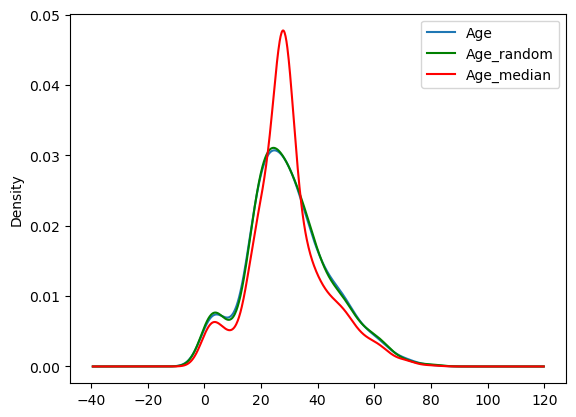

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df["Age"].plot(kind="kde", ax = ax)
df.Age_random.plot(kind="kde", ax = ax, color = "green")
df.Age_median.plot(kind="kde", ax = ax, color = "red")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = "best")

##### Advantages and disadvantages of random sample imputatio
##### Advantages
1. easy to implement
2. No distortion in variance

##### Disadvantages
1. every situation randomness wont work

### 3. Capturing NAN values with a new feature

1. it works well if the data is not missing at random

In [60]:
df = pd.read_csv("titanic_train.csv", usecols=["Age","Fare","Survived"])

In [61]:
df["Age_NAN"] = np.where(df["Age"].isnull(),1,0)

In [63]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [64]:
df["Age"].fillna(df["Age"].median, inplace = True)

In [ ]:
df.head(50)

### Advantages
1. easy to implement
2. captures the importance of missing values

### Disadbvantages
1. Creating aditional features

# Handling Categorical Features- Missing Values

In [27]:
import pandas as pd
df = pd.read_csv("House_price.csv", usecols=["BsmtQual",'FireplaceQu', 'GarageType',"SalePrice"])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [28]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [30]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:>

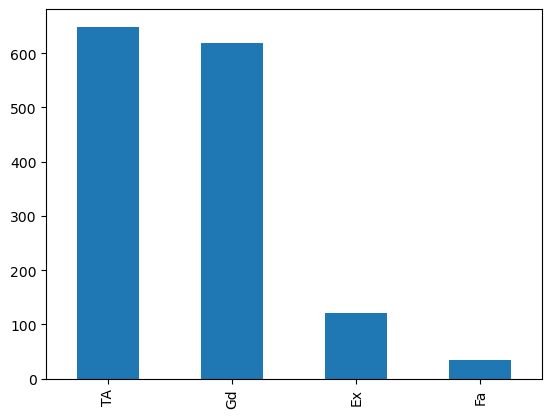

In [31]:
df["BsmtQual"].value_counts().plot.bar()

### 1. we can replace nan with frequent value 
this can be only used when missing values are less

In [32]:
def impute_NAN(df,variable):
    frequent = df[variable].mode()[0]
    df[variable].fillna(frequent,inplace = True)

In [33]:
impute_NAN(df,"BsmtQual")

In [37]:
df.isnull().mean()

BsmtQual       0.000000
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

#### disadvantages
this cannot be used if there is more missing values

### 2. adding new feature where the value is nan and also adding frequent value in nan

In [41]:
import numpy as np
df = pd.read_csv("House_price.csv", usecols=["BsmtQual",'FireplaceQu', 'GarageType',"SalePrice"])
df.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [43]:
df["BsmtQual_nan"] = np.where(df["BsmtQual"].isnull(),1,0)
frequent = df["BsmtQual"].mode()[0]
df["BsmtQual"].fillna(frequent, inplace = True)

In [46]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


### ***3. suppose if you have more frequent categories, we just replace nan with a new category

In [48]:
import numpy as np
df = pd.read_csv("House_price.csv", usecols=["BsmtQual",'FireplaceQu', 'GarageType',"SalePrice"])


In [49]:
def impute_nan(df,variable):
    df[variable] = np.where(df[variable].isnull(),"Missing",df[variable])

In [50]:
for feature in ["BsmtQual",'FireplaceQu', 'GarageType']:
    impute_nan(df,feature)

In [51]:
df.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [53]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64